In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import src.register_optimizer as regop
import src.QAA as qaa
from src import qubo

In [3]:
Q = np.array(
    [
        [-10.0, 19.7365809, 19.7365809, 5.42015853, 5.42015853],
        [19.7365809, -10.0, 20.67626392, 0.17675796, 0.85604541],
        [19.7365809, 20.67626392, -10.0, 0.85604541, 0.17675796],
        [5.42015853, 0.17675796, 0.85604541, -10.0, 0.32306662],
        [5.42015853, 0.85604541, 0.17675796, 0.32306662, -10.0],
    ]
)

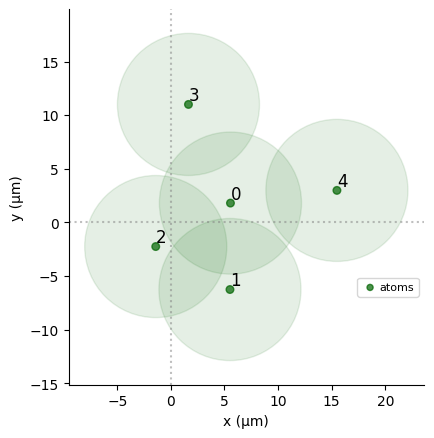

In [4]:
reg = regop.optimized_register(Q)
regop.draw_register(reg)

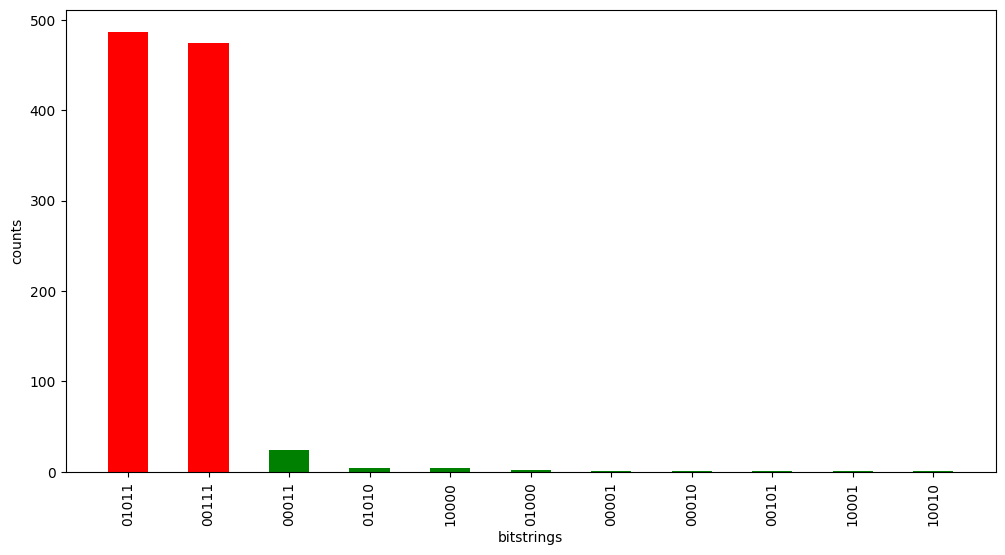

In [5]:
seq = qaa.adiabatic_sequence(Q, reg, 4000)
counts = qaa.get_counts(seq)
qaa.plot_distribution(counts)

[0.99669982804, 0.6247400677666667, 0.7321079162199999, 0.88090217174, 0.86079971956, 0.8746763351199999, 0.8937106967133331, 0.8943564189399998, 0.8978970469599998, 0.8995870349733334]


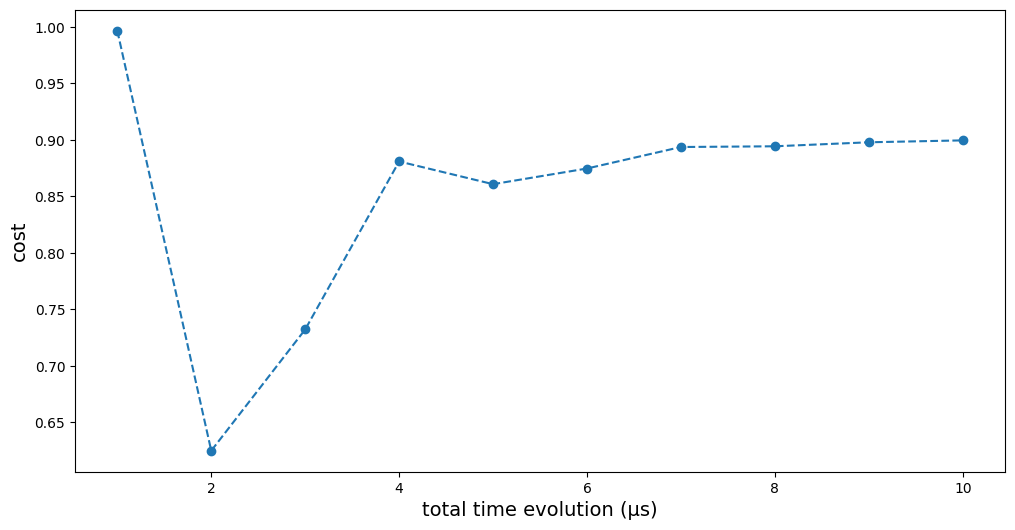

In [8]:
costs = []
for T in np.linspace(1000, 10000, 10):
    seq = qaa.adiabatic_sequence(Q, reg, T)
    counts = qaa.get_counts(seq)
    costs.append(qubo.get_cost(counts, Q)/3)
print(costs)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), np.array(costs), "--o")
plt.xlabel("total time evolution (µs)", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.show()
